# BSTRINGS COMPOUNDING

In [3]:
import numpy as np
import pylab as pl
pl.rcParams["figure.figsize"] = 9,6

In [4]:
def BString1(x: float) -> float:
    res = 0.5 * np.sin(2.* np.pi * x/2) ###x
    if x > 0.5:
        res = 0.5
    if x < -0.5:
        res = -0.5
    return res

In [5]:
############### One String Pulse with width, shift and scale #############
def StringPulse(String1, t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    if (x < -1):
        res = -0.5
    elif (x > 1):
        res = 0.5
    else:
        res = String1(x)
    res = d + res * c
    return res

In [6]:
###### Atomic String Applied to list with width, shift and scale #############
def String(String1, x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(StringPulse(String1, x[i], a, b, c, d))
    return res

In [7]:
###### Summation of two lists #############
def Sum(x1: list, x2: list) -> list:
    res = []
    for i in range(len(x1)):
        res.append(x1[i] + x2[i])
    return res

In [8]:
##########################################################
##This script introduces Atomic Function 
################### One Pulse of atomic function
def up1(x: float) -> float:
    #Atomic function table
    up_y = [0.5, 0.48, 0.460000017,0.440000421,0.420003478,0.400016184, 0.380053256, 0.360139056, 0.340308139, 0.320605107,
           0.301083436, 0.281802850, 0.262826445, 0.244218000, 0.226041554, 0.208361009, 0.191239338, 0.174736305, 
           0.158905389, 0.143991189, 0.129427260, 0.115840866, 0.103044024, 0.9110444278e-01, 0.798444445e-01, 0.694444445e-01, 
           0.598444445e-01, 0.510444877e-01, 0.430440239e-01, 0.358409663e-01, 0.294282603e-01, 0.237911889e-01, 0.189053889e-01, 
           0.147363055e-01, 0.112393379e-01, 0.836100883e-02, 0.604155412e-02, 0.421800000e-02, 0.282644445e-02, 0.180999032e-02, 
           0.108343562e-02, 0.605106267e-03, 0.308138660e-03, 0.139055523e-03, 0.532555251e-04, 0.161841328e-04, 0.347816874e-05, 
           0.420576116e-05, 0.167693347e-07, 0.354008603e-10, 0]
    up_x = np.arange(0.5, 1.01, 0.01)

    res = 0.
    if ((x >= 0.5) and (x <= 1)):
        for i in range(len(up_x) - 1):
            if (up_x[i] >= x) and (x < up_x[i+1]):
                N1 = 1 - (x - up_x[i])/0.01
                res = N1 * up_y[i] + (1 - N1) * up_y[i+1]
                return res
    return res



In [9]:
############### Atomic Function Pulse with width, shift and scale #############
def pulse(up1, t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    res = 0.
    if (x >= 0.5) and (x <= 1):
        res = up1(x)
    elif (x >= 0.0) and (x < 0.5):
        res = 1 - up1(1 - x)
    elif (x >= -1 and x <= -0.5):
        res = up1(-x)
    elif (x > -0.5) and (x < 0):
        res = 1 - up1(1 + x)
    res = d + res * c
    return res

############### Atomic Function Applied to list with width, shift and scale #############
def up(up1, x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(pulse(up1, x[i], a, b, c, d))
    return res

In [11]:
x = np.arange(-2.0, 2.0, 0.01)

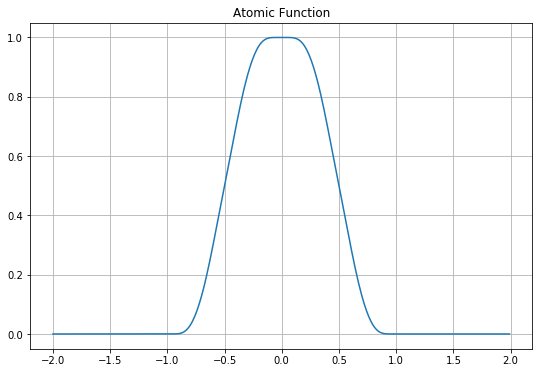

In [12]:
pl.title('Atomic Function')
pl.plot(x, up(up1, x), label='Atomic Function')
pl.grid(True)
pl.show()

### Atomic String as an Integral of Atomic Function (introduced in 2017 by Prof S.Eremenko)

In [13]:
############### Atomic String #############
def AString1(x: float) -> float:
    res = 1 * (pulse(up1, x/2.0 - 0.5) - 0.5)
    return res

############### Atomic String Pulse with width, shift and scale #############
def AStringPulse(t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    if (x < -1):
        res = -0.5
    elif (x > 1):
        res = 0.5
    else:
        res = AString1(x)
    res = d + res * c
    return res

###### Atomic String Applied to list with width, shift and scale #############
def AString(x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(AStringPulse(x[i], a, b, c, d))
    return res

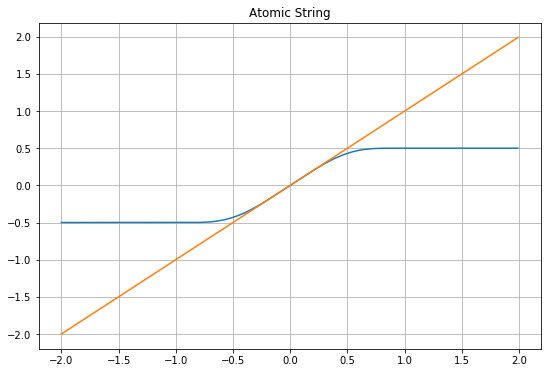

In [14]:
pl.title('Atomic String')
pl.plot(x, String(AString1, x, 1.0, 0, 1, 0), label='Atomic String')
pl.plot(x, x, label='y = x')
pl.grid(True)
pl.show()

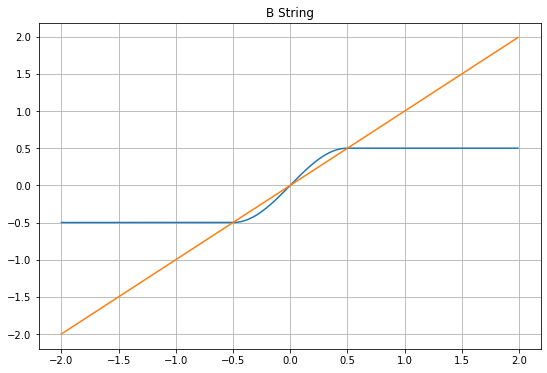

In [16]:
pl.title('B String')
pl.plot(x, String(BString1, x, 1.0, 0, 1, 0), label='B String')
pl.plot(x, x, label='y = x')
pl.grid(True)
pl.show()

### Atomic String, Atomic Function and Atomic Function Derivative plotted together

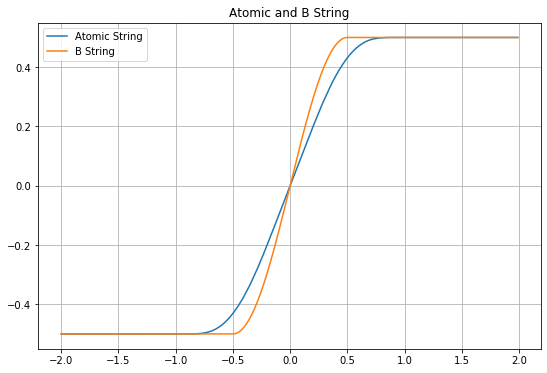

In [17]:
pl.plot(x, String(AString1, x, 1.0, 0, 1, 0), label='Atomic String')
pl.plot(x, String(BString1, x, 1.0, 0, 1, 0), label='B String')

pl.title('Atomic and B String')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

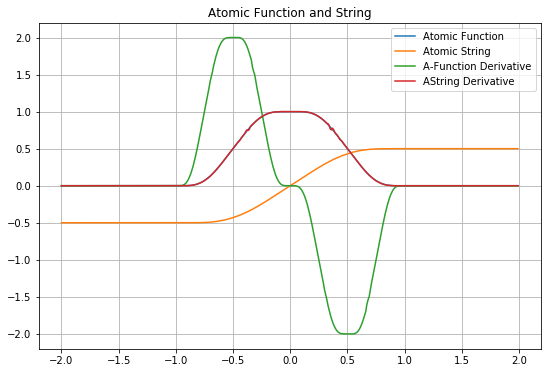

In [18]:
#This Calculates Derivative
dx = x[1] - x[0]
dydx = np.gradient(up(up1, x), dx)
dydx1 = np.gradient(String(AString1, x), dx)

pl.plot(x, up(up1, x), label='Atomic Function')
pl.plot(x, String(AString1, x, 1.0, 0, 1, 0), label='Atomic String')

pl.plot(x, dydx, label='A-Function Derivative')
pl.plot(x, dydx1, label='AString Derivative')

pl.title('Atomic Function and String')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

In [19]:
# BUP Function = BString(2x+1) - BString(2x-1)
def bup1(x : float) -> float:
    #res = String(BString1, x, 0.5, -0.5, 1, 0) - String(BString1, x, 0.5, +0.5, 1, 0)
    res = BString1(2.*x+1) - BString1(2.*x-1)
    return res

In [20]:
bup1(0.5)

0.5

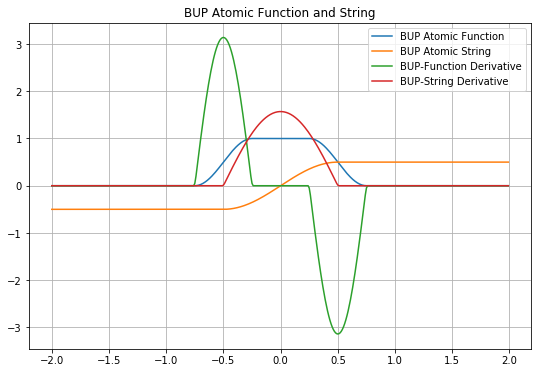

In [22]:
#This Calculates Derivative
dx = x[1] - x[0]
dydx = np.gradient(up(bup1, x), dx)
dydx1 = np.gradient(String(BString1, x), dx)

pl.plot(x, up(bup1, x), label='BUP Atomic Function')
pl.plot(x, String(BString1, x, 1.0, 0, 1, 0), label='BUP Atomic String')

pl.plot(x, dydx,  label='BUP-Function Derivative')
pl.plot(x, dydx1, label='BUP-String Derivative')

pl.title('BUP Atomic Function and String')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

### Properties of atomic function Up(x)

1) Remarkably, Atomic Function Derivative can be exressed via Atomic Function itself - up'(x)= 2up(2x+1)-2up(2x-1) meaning the shape of pulses for derivative function can be represented by shifted and stratched Atomic Function itself - remarkable property

2) The Atomic Function pulses superposition set at points -2, -1, 0, +1, +2... can exactly represent a Unity (number 1):
1 = ... up(x-3) + up(x-2) + up(x-1) + up(x-0) + up(x+1) + up(x+2) + up(x+3) + ...

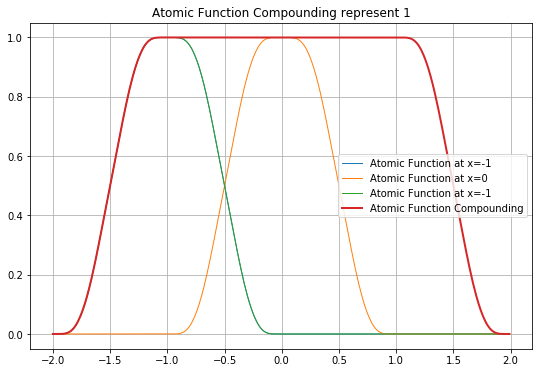

In [23]:
pl.plot(x, up(up1, x, 1, -1), linewidth=1, label='Atomic Function at x=-1')
pl.plot(x, up(up1, x, 1, +0), linewidth=1, label='Atomic Function at x=0')
pl.plot(x, up(up1, x, 1, -1), linewidth=1, label='Atomic Function at x=-1')
pl.plot(x, Sum(up(up1, x, 1, -1), Sum(up(up1, x), up(up1, x, 1, 1))), linewidth=2, label='Atomic Function Compounding')
pl.title('Atomic Function Compounding represent 1')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

### Properties of BUP atomic function BUp(x)

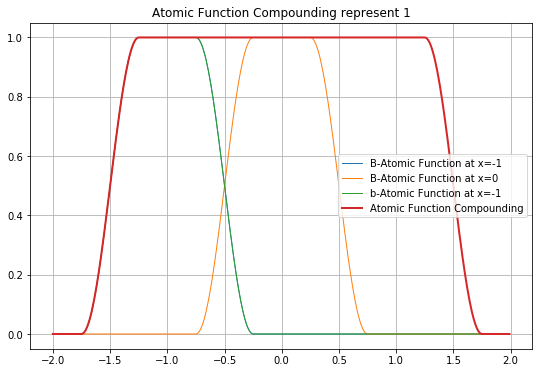

In [24]:
pl.plot(x, up(bup1, x, 1, -1), linewidth=1, label='B-Atomic Function at x=-1')
pl.plot(x, up(bup1, x, 1, +0), linewidth=1, label='B-Atomic Function at x=0')
pl.plot(x, up(bup1, x, 1, -1), linewidth=1, label='b-Atomic Function at x=-1')
pl.plot(x, Sum(up(bup1, x, 1, -1), Sum(up(bup1, x), up(bup1, x, 1, 1))), linewidth=2, label='Atomic Function Compounding')
pl.title('Atomic Function Compounding represent 1')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

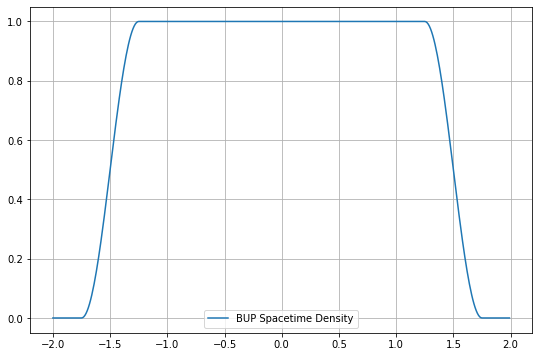

In [25]:
### Integration of BUP
CS6 = Sum(up(bup1, x, 1, -1), Sum(up(bup1, x), up(bup1, x, 1, 1)))
pl.plot(x, CS6,  label='BUP Spacetime Density')
pl.legend(loc='best', numpoints=1)
pl.grid(True)

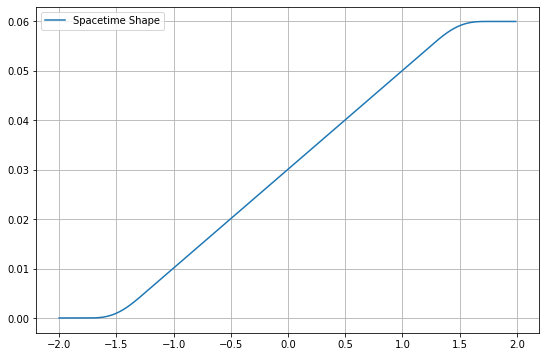

In [26]:
IntC6 = np.cumsum(CS6)*dx/50
pl.plot(x, IntC6, label='Spacetime Shape')
pl.legend(loc='best', numpoints=1)
pl.grid(True)

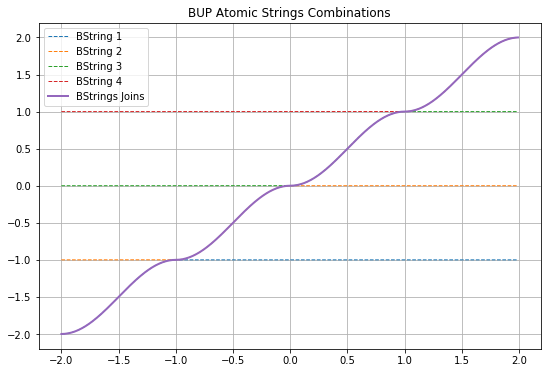

In [27]:
#pl.plot(x, ABline (x, 1, 0),            label='ABLine 1*x')
pl.plot(x, String(BString1, x, 1.0, -1.5, 1, -1.5), '--',  linewidth=1, label='BString 1')
pl.plot(x, String(BString1, x, 1.0, -0.5, 1, -0.5), '--',  linewidth=1, label='BString 2')
pl.plot(x, String(BString1, x, 1.0, +0.5, 1, +0.5), '--',  linewidth=1, label='BString 3')
pl.plot(x, String(BString1, x, 1.0, +1.5, 1, +1.5), '--',  linewidth=1, label='BString 4')

AS2 = Sum(String(BString1, x, 1.0, -1.5, 1,  -1.5), String(BString1, x, 1.0, -0.5, 1.0, -0.5))
AS3 = Sum(AS2, String(BString1, x, 1, 0.5, 1, +0.5))
AS4 = Sum(AS3, String(BString1, x, 1,+1.5, 1, +1.5))
pl.plot(x, AS4, label='BStrings Joins', linewidth=2)

pl.title('BUP Atomic Strings Combinations')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

### Atomic String is a generalisation of an Atomic Function

1) Astring is an swing-like function - Integral of Atomic Function (AF) which can be expressed via AF itself:
AString(x) = Integral(0,x)(Up(x)) = Up(x/2 - 1/2) - 1/2

2) Atomic Function can be represented via simple superposition of Atomic Strings: 
up(x) = AString(2x + 1) - AString(2x - 1)

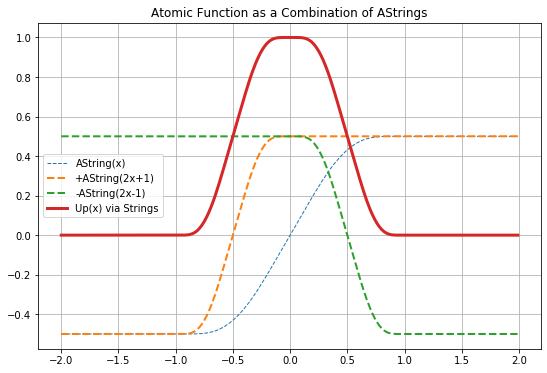

In [28]:
#########   Presentation of Atomic Function via Atomic Strings ##########
x = np.arange(-2.0, 2.0, 0.01)

pl.plot(x, String(AString1, x, 1, 0, 1, 0),  '--', linewidth=1,  label='AString(x)')
pl.plot(x, String(AString1, x, 0.5, -0.5, +1, 0), '--', linewidth=2, label='+AString(2x+1)')
pl.plot(x, String(AString1, x, 0.5, +0.5, -1, 0), '--', linewidth=2, label='-AString(2x-1)')
#pl.plot(x, up(x, 1.0, 0, 1, 0),     '--', linewidth=1, label='Atomic Function')
AS2 = Sum(String(AString1, x, 0.5, -0.5, +1, 0), String(AString1, x, 0.5, +0.5, -1, 0))
pl.plot(x, AS2, linewidth=3, label='Up(x) via Strings')
pl.title('Atomic Function as a Combination of AStrings')
pl.legend(loc='center left', numpoints=1)
pl.grid(True)
pl.show()

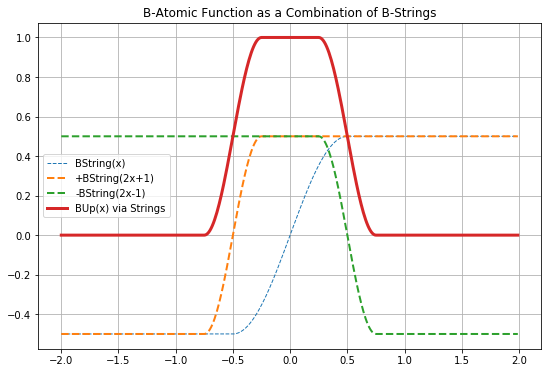

In [30]:
#########   Presentation of BUP Atomic Function via Atomic Strings ##########
x = np.arange(-2.0, 2.0, 0.01)

pl.plot(x, String(BString1, x, 1, 0, 1, 0),  '--', linewidth=1,  label='BString(x)')
pl.plot(x, String(BString1, x, 0.5, -0.5, +1, 0), '--', linewidth=2, label='+BString(2x+1)')
pl.plot(x, String(BString1, x, 0.5, +0.5, -1, 0), '--', linewidth=2, label='-BString(2x-1)')
#pl.plot(x, up(x, 1.0, 0, 1, 0),     '--', linewidth=1, label='Atomic Function')
AS2 = Sum(String(BString1, x, 0.5, -0.5, +1, 0), String(BString1, x, 0.5, +0.5, -1, 0))
pl.plot(x, AS2, linewidth=3, label='BUp(x) via Strings')
pl.title('B-Atomic Function as a Combination of B-Strings')
pl.legend(loc='center left', numpoints=1)
pl.grid(True)
pl.show()

3) All derivatives of AString can be represented via AString itself:
AString'(x) = AString(2x + 1) - AString(2x - 1)

4) Combination of Atomic Strings can exactly represent a straight line:
x = AString(x) + Astring(x+1) + Astring(x+2)...

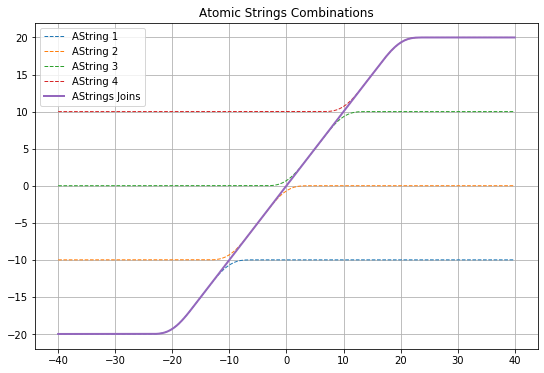

In [31]:
x = np.arange(-40.0, 40.0, 0.01)

#pl.plot(x, ABline (x, 1, 0),            label='ABLine 1*x')
pl.plot(x, AString(x, 10.0,-15, 10, -15),   '--',  linewidth=1, label='AString 1')
pl.plot(x, AString(x, 10.0, -5, 10, -5),    '--',  linewidth=1, label='AString 2')
pl.plot(x, AString(x, 10.0, +5, 10, +5),    '--',  linewidth=1, label='AString 3')
pl.plot(x, AString(x, 10.0,+15, 10, +15),   '--',  linewidth=1, label='AString 4')

AS2 = Sum(AString(x, 10.0, -15, 10, -15), AString(x, 10., -5, 10, -5))
AS3 = Sum(AS2, AString(x, 10, +5, 10, +5))
AS4 = Sum(AS3, AString(x, 10,+15, 10, +15))
pl.plot(x, AS4,  label='AStrings Joins', linewidth=2)

pl.title('Atomic Strings Combinations')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()


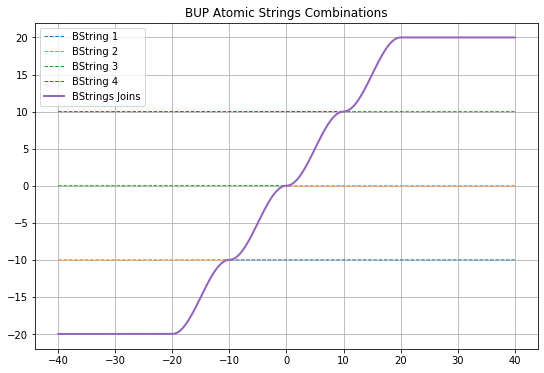

In [33]:
x = np.arange(-40.0, 40.0, 0.01)

#pl.plot(x, ABline (x, 1, 0),            label='ABLine 1*x')
pl.plot(x, String(BString1, x, 10.0,-15, 10, -15),   '--',  linewidth=1, label='BString 1')
pl.plot(x, String(BString1, x, 10.0, -5, 10, -5),    '--',  linewidth=1, label='BString 2')
pl.plot(x, String(BString1, x, 10.0, +5, 10, +5),    '--',  linewidth=1, label='BString 3')
pl.plot(x, String(BString1, x, 10.0,+15, 10, +15),   '--',  linewidth=1, label='BString 4')

AS2 = Sum(String(BString1, x, 10.0, -15, 10, -15), String(BString1, x, 10., -5, 10, -5))
AS3 = Sum(AS2, String(BString1, x, 10, +5, 10, +5))
AS4 = Sum(AS3, String(BString1, x, 10,+15, 10, +15))
pl.plot(x, AS4, label='BStrings Joins', linewidth=2)

pl.title('BUP Atomic Strings Combinations')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

### Representing of flat Spacetime Fabric by joining of Atomic Strings Quanta (Metriants)

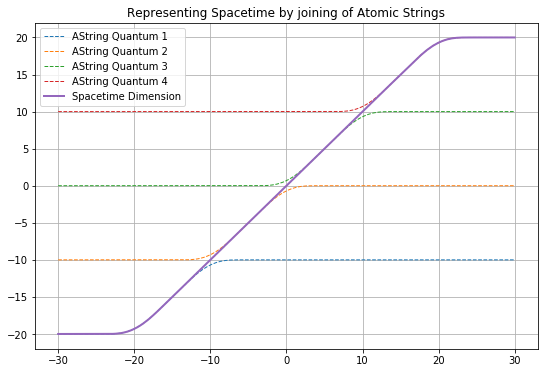

In [32]:
x = np.arange(-30.0, 30.0, 0.01)
#pl.plot(x, ABline (x, 1, 0),            label='ABLine 1*x')
pl.plot(x, AString(x, 10.0,-15, 10, -15),   '--',  linewidth=1, label='AString Quantum 1')
pl.plot(x, AString(x, 10.0, -5, 10, -5),    '--',  linewidth=1, label='AString Quantum 2')
pl.plot(x, AString(x, 10.0, +5, 10, +5),    '--',  linewidth=1, label='AString Quantum 3')
pl.plot(x, AString(x, 10.0,+15, 10, +15),   '--',  linewidth=1, label='AString Quantum 4')

AS2 = Sum(AString(x, 10.0, -15, 10, -15), AString(x, 10., -5, 10, -5))
AS3 = Sum(AS2, AString(x, 10, +5, 10, +5))
AS4 = Sum(AS3, AString(x, 10,+15, 10, +15))
pl.plot(x, AS4,  label='Spacetime Dimension', linewidth=2)

pl.title('Representing Spacetime by joining of Atomic Strings')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

### Schematic model of Gravitation explaining General Relativity effects where spacetime Shape, Density and Curvature are deeply related being expressed via the same AString or Atomic Function

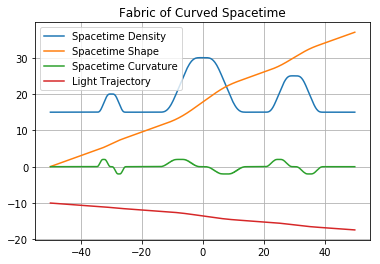

In [25]:
x = np.arange(-50.0, 50.0, 0.1)
dx = x[1] - x[0]

CS6 = Sum(up(up1, x, 5, -30, 5, 5), up(up1, x, 15, 0, 15, 5))
CS6 = Sum(CS6, up(up1, x, 10, +30, 10, 5))
pl.plot(x, CS6,  label='Spacetime Density')

IntC6 = np.cumsum(CS6)*dx/50
pl.plot(x, IntC6, label='Spacetime Shape')

DerC6 = np.gradient(CS6, dx)
pl.plot(x, DerC6, label='Spacetime Curvature')

LightTrajectory = -10 -IntC6/5
pl.plot(x, LightTrajectory, label='Light Trajectory')

pl.title('Fabric of Curved Spacetime')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

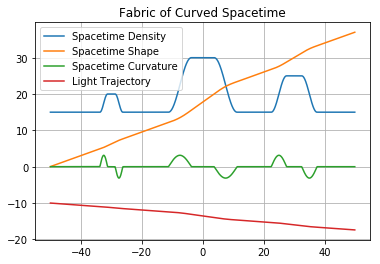

In [26]:
x = np.arange(-50.0, 50.0, 0.1)
dx = x[1] - x[0]

CS6 = Sum(up(bup1, x, 5, -30, 5, 5), up(bup1, x, 15, 0, 15, 5))
CS6 = Sum(CS6, up(bup1, x, 10, +30, 10, 5))
pl.plot(x, CS6,  label='Spacetime Density')

IntC6 = np.cumsum(CS6)*dx/50
pl.plot(x, IntC6, label='Spacetime Shape')

DerC6 = np.gradient(CS6, dx)
pl.plot(x, DerC6, label='Spacetime Curvature')

LightTrajectory = -10 -IntC6/5
pl.plot(x, LightTrajectory, label='Light Trajectory')

pl.title('Fabric of Curved Spacetime')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

Apart from standard Python code, this script and material is the intellectual property of Professor Sergei Yu. Eremenko (https://au.linkedin.com/in/sergei-eremenko-3862079). You may not reproduce, edit, translate, distribute, publish or host this document in any way without the permission of Professor Eremenko.

# Integration of BStrings

In [27]:
def integrate(a, b, N = 100):
    t = np.linspace(a + (b-a)/(2*N), b- (b-a)/(2*N), N) # Central Points of subintervals
    # fx = f(x)
    fx = []
    for i in range(len(t)):
        # fx.append(pulse(up1, t[i]))
        fx.append(pulse(bup1, t[i]))
        #print (i, t[i], fx[i])
    area = np.sum(fx) * (b-a)/N
    return area

In [28]:
integrate(-1, 1)

1.0